In [55]:
from data import train
from sklearn.svm import SVR
import numpy as np
from multiprocessing import cpu_count
from utils import StandardizedGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

In [56]:
X=train.drop('sales', axis=1)
y=train.sales

In [ ]:
from data import train_train
train_train

In [5]:
#Random Forest and Bagging Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X,y)

paramr = {'n_estimators' : (10,50,100)
              , 'criterion' : ('mse','mae')
              , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int),
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : (None,'auto','sqrt')
              , 'min_samples_split' : (2,4,6)
            #   , 'ccp_alpha' : (0.01,0.02,0.03,0.04)
             }
             #depth = 10,12,14

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('mse', 'mae'),
                         'max_depth': (3, 5, 7, 9, 10),
                         'max_features': (None, 'auto', 'sqrt'),
                         'min_samples_split': (2, 4, 6),
                         'n_estimators': (10, 50, 100)},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [6]:
RF_Grid.save('models/RF.p')

In [17]:
RF_Grid.results.head(10)

9         NaN          2                 100                  0.024534   
          10        auto         6                 100                  0.026529   
          9         NaN          2                 50                   0.017454   
                    auto         4                 100                  0.023437   
mae       9         auto         4                 100                  0.027626   
          7         NaN          2                 100                  0.024235   
mse       7         auto         6                 100                  0.027626   
mae       9         NaN          2                 100                  0.027626   

                                                                 std_score_time  \
criterion max_depth max_features min_samples_split n_estimators                   
mse       9         auto         6                 10                  0.003940   
          10        NaN          2                 50                  0.001956   
          9         NaN          2                 100                 0.002570   
          10        auto         6                 100                 0.002148   
          9         NaN          2                 50                  0.004992   
                    auto         4                 100                 0.001742   
mae       9         auto         4                 100                 0.005901   
          7         NaN          2                 100                 0.004113   
mse       7         auto         6                 100                 0.004113   
mae       9         NaN          2                 100                 0.006780   

                                                                 split0_test_neg_mean_squared_error  \
criterion max_depth max_features min_samples_split n_estimators                                       
mse       9         auto         6                 10                                   -860.536273   
          10        NaN          2                 50                                   -734.056890   
          9         NaN          2                 100                                  -753.284404   
          10        auto         6                 100                                  -687.489591   
          9         NaN          2                 50                                   -758.693731   
                    auto         4                 100                                  -766.625163   
mae       9         auto         4                 100                                  -994.323791   
          7         NaN          2                 100                                 -1066.018946   
mse       7         auto         6                 100                                  -767.617369   
mae       9         NaN          2                 100                                 -1108.864355   

                                                                 split1_test_neg_mean_squared_error  \
criterion max_depth max_features min_samples_split n_estimators                                       
mse       9         auto         6                 10                                  -1336.394031   
          10        NaN          2                 50                                  -1255.844751   
          9         NaN          2                 100                                 -1230.227345   
          10        auto         6                 100                                 -1264.764474   
          9         NaN          2                 50                                  -1223.618053   
                    auto         4                 100                                 -1181.513197   
mae       9         auto         4                 100                                 -1353.141048   
          7         NaN          2                 100                                 -1471.255911   
mse       7         auto         6                 100                   

In [23]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('n_estimators').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
n_estimators,,
10,1995.225769,3553.344928
50,1885.521058,3433.289327
100,1865.453537,3389.822104


In [22]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('criterion').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
criterion,,
mae,2175.179452,3584.114613
mse,1655.620791,3333.522959


In [21]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_features').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_features,,
auto,1107.933597,2835.123846
sqrt,3524.229510,4715.244002


min_samples_split
2    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
4    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
6    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

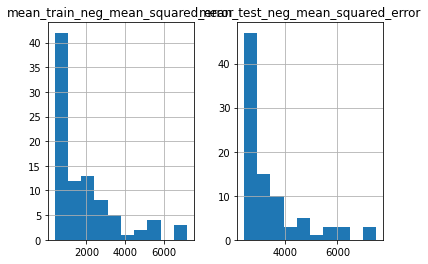

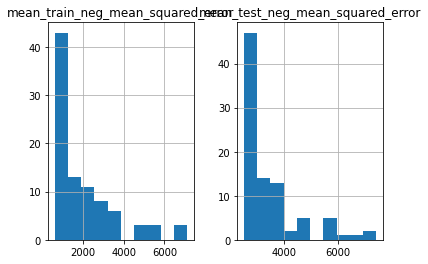

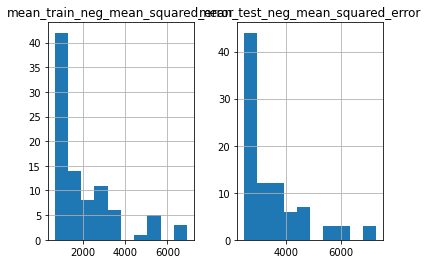

In [26]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('min_samples_split').hist()


criterion
mae    AxesSubplot(0.125,0.125;0.775x0.755)
mse    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_test_neg_mean_squared_error, dtype: object

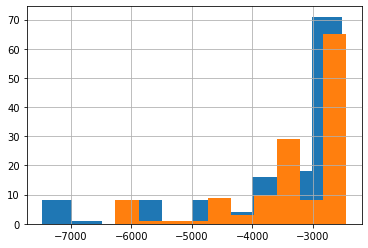

In [15]:
RF_Grid.results['mean_test_neg_mean_squared_error'].groupby('criterion').hist()

In [29]:
#Random Forest and Bagging Model
#RUN 2
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50)
RF.fit(X,y)
paramr = {  'criterion' : ('mse','mae')
              , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : (9,10,12)
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : (0.1,1,10)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=50), n_jobs=-1,
             param_grid={'ccp_alpha': (0.1, 1, 10), 'criterion': ('mse', 'mae'),
                         'max_depth': (9, 10, 12),
                         'max_features': (None, 'auto'),
                         'max_leaf_nodes': array([ 199,  629, 1992])},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 'r2'], verbose=10)

In [30]:
RF_Grid.save('models/RFe50.p')

In [31]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_features').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_features,,
auto,1851.789347,3371.515468


In [33]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('criterion').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
criterion,,
mae,3221.085660,4154.229824
mse,481.424923,2590.768661


In [34]:
RF_Grid.results.head(10)

10        NaN          629                  2.269565   
                                           199                  2.210904   

                                                           std_fit_time  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                 
1.0       mse       10        auto         199                 0.171242   
                              NaN          629                 0.091926   
                    9         auto         1992                0.091620   
                                           199                 0.082004   
                    12        NaN          199                 0.195587   
0.1       mae       10        auto         629                 0.750402   
          mse       9         auto         1992                0.137142   
1.0       mse       10        auto         629                 0.183072   
0.1       mse       10        NaN          629                 0.076147   
                                           199                 0.107924   

                                                           mean_score_time  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                    
1.0       mse       10        auto         199                    0.015584   
                              NaN          629                    0.015485   
                    9         auto         1992                   0.017891   
                                           199                    0.016939   
                    12        NaN          199                    0.015372   
0.1       mae       10        auto         629                    0.013823   
          mse       9         auto         1992                   0.015513   
1.0       mse       10        auto         629                    0.014795   
0.1       mse       10        NaN          629                    0.019023   
                                           199                    0.015755   

                                                           std_score_time  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                   
1.0       mse       10        auto         199                   0.001685   
                              NaN          629                   0.001876   
                    9         auto         1992                  0.009554   
                                           199                   0.002284   
                    12        NaN          199                   0.002282   
0.1       mae       10        auto         629                   0.001988   
          mse       9         auto         1992                  0.004097   
1.0       mse       10        auto         629                   0.001563   
0.1       mse       10        NaN          629                   0.005073   
                                           199                   0.002150   

                                                           split0_test_neg_mean_squared_error  \
ccp_alpha criterion max_depth max_features max_leaf_nodes                                       
1.0       mse       10        auto         199                                    -683.491642   
                              NaN          629                                    -706.258133   
                    9         auto         1992                                   -736.225889   
                                           199                                    -723.570004   
                    12        NaN          199                                    -698.066201   
0.1       mae       10        auto         629                                   -1216.399332   
          mse       9         auto         1992                                   -788.833810   
1.0       mse       10        auto         629                                    -692.011369   
0.1       mse       10        NaN          629                                    -699.843315   
                                     

In [35]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.1,523.962113,2590.088524
1.0,1613.359862,3058.664946
10.0,3416.443899,4468.744257


In [36]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_leaf_nodes').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_leaf_nodes,,
199,1851.381491,3360.721513
629,1850.140682,3375.782806
1992,1852.243700,3380.993408


In [38]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('max_depth').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
max_depth,,
9,1859.602877,3379.749784
10,1853.596364,3359.728145
12,1840.566634,3378.019798


In [48]:
#Random Forest and Bagging Model
#RUN 3
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50)
RF.fit(X,y)
paramr = {  'criterion' :['mse']
            #   , 'max_leaf_nodes' : (np.logspace(-1, 0, 3) * train.shape[0]).astype(int)
              , 'max_depth' : [10]
              , 'max_features' : (None,'auto')
              , 'ccp_alpha' : np.linspace(0.01, 1, 100)
             }

RF_Grid = StandardizedGridSearchCV(RF,paramr)
RF_Grid.fit(X,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=50), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49,...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                         'criterion': ['mse'], 'max_depth': [10],
                         'max_features': (None, 'auto')},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error', 

In [49]:
RF_Grid.save('models/RF3.p')

In [50]:
RF_Grid.results.head(10)

,,,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,split5_test_neg_mean_squared_error,...,split2_train_r2,split3_train_r2,split4_train_r2,split5_train_r2,split6_train_r2,split7_train_r2,split8_train_r2,split9_train_r2,mean_train_r2,std_train_r2
ccp_alpha,criterion,max_depth,max_features,,,,,,,,,,,,,,,,,,,,,
0.40,mse,10,auto,2.899884,0.190939,0.022561,0.002941,-755.626536,-1130.759937,-1694.508315,-1775.814405,-2172.628731,-1216.508806,...,0.960095,0.966893,0.957276,0.962863,0.953173,0.961897,0.966917,0.957073,0.960333,0.004164
0.26,mse,10,auto,2.864082,0.130700,0.028877,0.008176,-677.526201,-1104.905571,-1531.601132,-1823.970063,-1864.418735,-1135.122540,...,0.959303,0.957509,0.965415,0.963031,0.954947,0.955528,0.965571,0.950377,0.958980,0.004574
0.37,mse,10,auto,2.508874,0.259479,0.026801,0.012177,-780.857270,-1131.299373,-1545.118862,-1647.605753,-2340.118346,-1267.582515,...,0.950897,0.960197,0.963135,0.956457,0.952452,0.961652,0.962080,0.952311,0.957269,0.004271
0.09,mse,10,NaN,2.408103,0.255367,0.023288,0.007993,-685.879815,-1247.368889,-1602.747915,-1816.489336,-2402.069959,-1168.383123,...,0.962631,0.962500,0.959854,0.953452,0.954563,0.956357,0.964922,0.961207,0.959815,0.004122
0.41,mse,10,auto,2.863000,0.166757,0.022919,0.003531,-754.359279,-1195.760152,-1644.272291,-1679.493063,-2186.962712,-1240.085854,...,0.961984,0.954638,0.958405,0.958572,0.961221,0.961501,0.969827,0.949502,0.959334,0.005739
0.75,mse,10,NaN,2.790311,0.155244,0.027522,0.011107,-691.196682,-1326.688986,-2246.760563,-1614.182492,-2031.203491,-1213.981100,...,0.961767,0.958783,0.964610,0.957600,0.952811,0.960372,0.964812,0.955528,0.959116,0.003725
0.16,mse,10,NaN,2.820084,0.149843,0.024837,0.004359,-774.392890,-1150.255681,-1123.755966,-1666.610928,-2227.564881,-1144.760464,...,0.960626,0.960278,0.960421,0.961381,0.954694,0.964590,0.967074,0.962144,0.961276,0.003027
0.82,mse,10,auto,2.568868,0.142420,0.019984,0.007035,-708.267609,-1175.909523,-2141.931342,-1694.730043,-2768.783052,-1212.592417,...,0.958538,0.965960,0.961876,0.963840,0.959715,0.958723,0.963014,0.958853,0.960296,0.003123
0.34,mse,10,auto,2.511113,0.195342,0.030569,0.015252,-697.633161,-1077.643726,-1693.960023,-1688.088708,-2824.018827,-1200.085094,...,0.958557,0.961148,0.962986,0.960990,0.954738,0.964273,0.967007,0.952169,0.959687,0.004791


In [51]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean()

,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error
ccp_alpha,,
0.01,415.459104,2457.605728
0.02,403.068408,2531.019440
0.03,405.120889,2595.617216
0.04,396.390804,2540.406584
0.05,385.953300,2533.883679
...,...,...
0.96,424.202244,2530.222280
0.97,422.735572,2700.666507
0.98,440.051091,2652.354658


array([[<AxesSubplot:title={'center':'mean_train_neg_mean_squared_error'}>,
        <AxesSubplot:title={'center':'mean_test_neg_mean_squared_error'}>]],
      dtype=object)

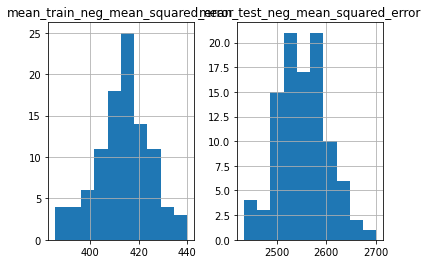

In [52]:
(-RF_Grid.results[['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error']]).groupby('ccp_alpha').mean().hist()

In [53]:
from data import train_train